# Assignment 1  
Mohammad Rashiqul Alam  
malam25@illinois.edu  

In [6]:
# Modules
import os
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
from   PIL import Image


## Image Pre-Processing

### Import All Images
Import low-resolution images from ~/data/  
Import high-resolution images from ~/data_hires/

**Notebook assumes both data and data_hires directories are in the same level as the notebook!

In [ ]:
def load_and_split_image(directory, filename, hires=False, border_percent=0.08):
    """
    Load an image, normalize, split into top/middle/bottom, and remove borders.
    Args:
        directory (str): Directory path.
        filename (str): Image filename.
        hires (bool): True for high-res (.tif), False for low-res (.jpg).
        border_percent (float): Border percentage to crop.
    Returns:
        (top, middle, bottom): Cropped slices as numpy arrays.
    """

    # Load image and normalize
    path = os.path.join(directory, filename)
    image = Image.open(path)
    if hires:
        image_array = np.array(image) / 65535.0
    else:
        image = image.convert('L')
        image_array = np.array(image) / 255.0

    # Split into slices
    h = image_array.shape[0]
    h_per = h // 3
    top    = image_array[0 : h_per, :]
    middle = image_array[h_per : 2*h_per, :]
    bottom = image_array[2*h_per : 3*h_per, :]

    # Remove borders
    def remove_borders(channel, border_percent):
        height, width = channel.shape
        bh = int(height * border_percent)
        bw = int(width * border_percent)
        return channel[bh:height-bh, bw:width-bw]

    top    = remove_borders(top, border_percent)
    middle = remove_borders(middle, border_percent)
    bottom = remove_borders(bottom, border_percent)

    return top, middle, bottom

In [ ]:
# Define directories
data_dir = os.path.join(os.getcwd(), "data")
data_hires_dir = os.path.join(os.getcwd(), "data_hires")

# List all image files
image_files_low_res = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]
image_files_high_res = [f for f in os.listdir(data_hires_dir) if f.endswith('.tif')]

# Extract slices for low-resolution images
low_res_slices = []
for filename in image_files_low_res:
    top, middle, bottom = load_and_split_image(data_dir, filename, hires=False)
    low_res_slices.append((top, middle, bottom))

# Extract slices for high-resolution images
high_res_slices = []
for filename in image_files_high_res:
    top, middle, bottom = load_and_split_image(data_hires_dir, filename, hires=True)
    high_res_slices.append((top, middle, bottom))

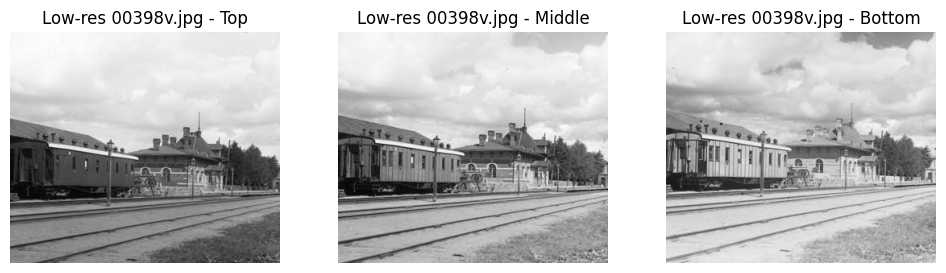

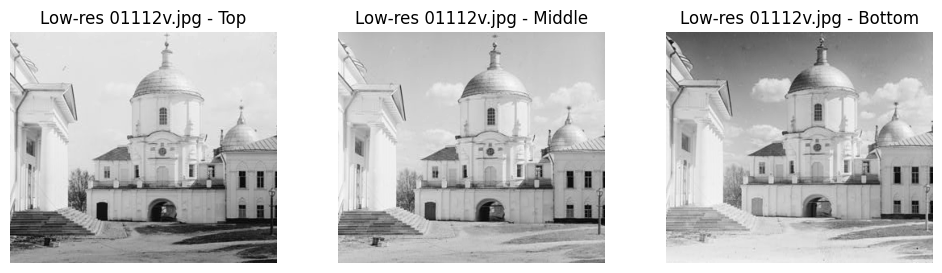

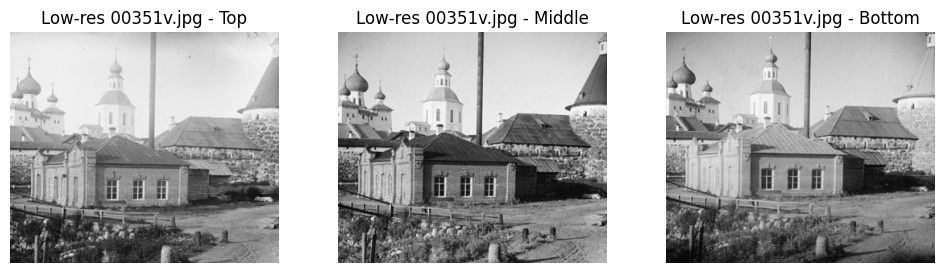

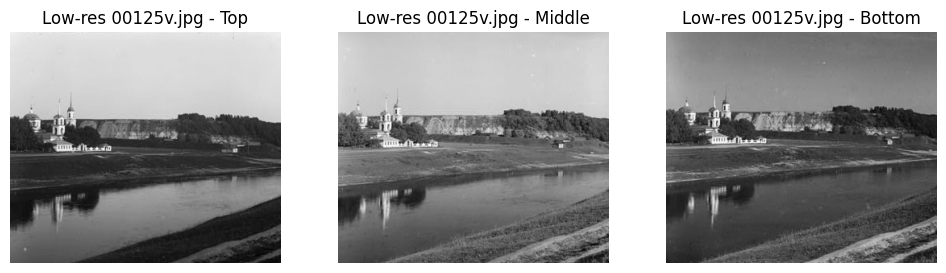

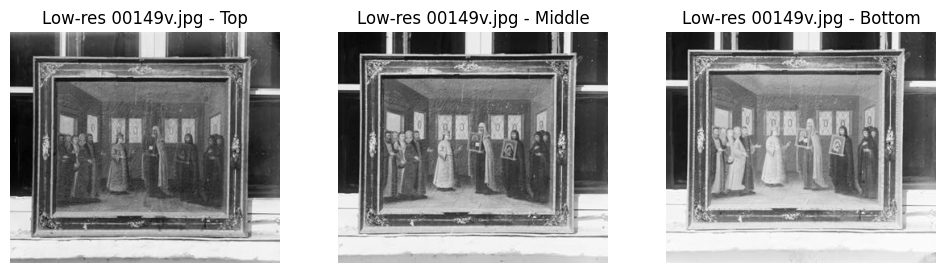

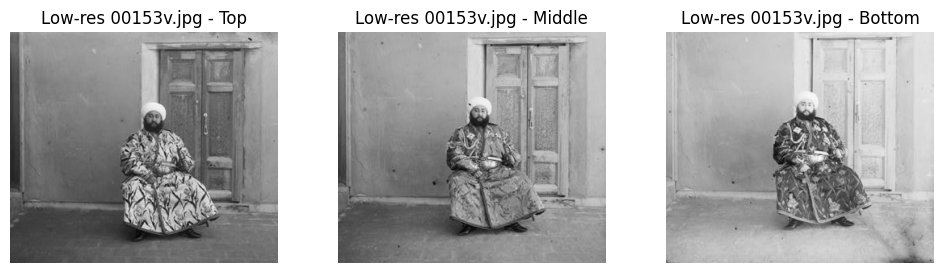

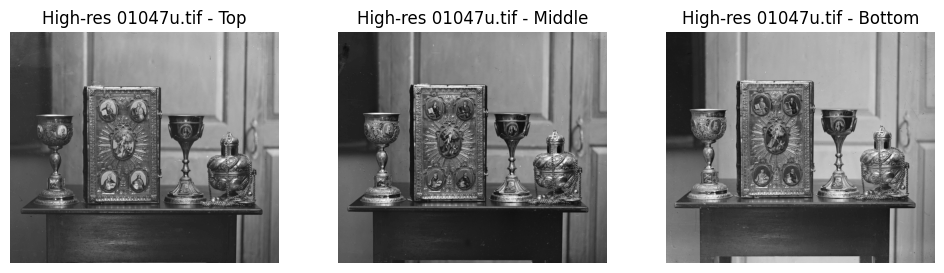

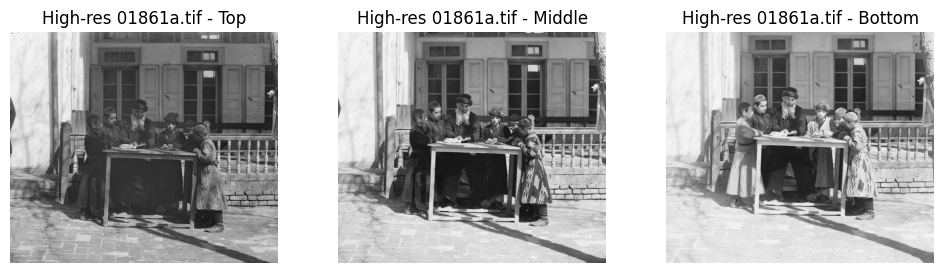

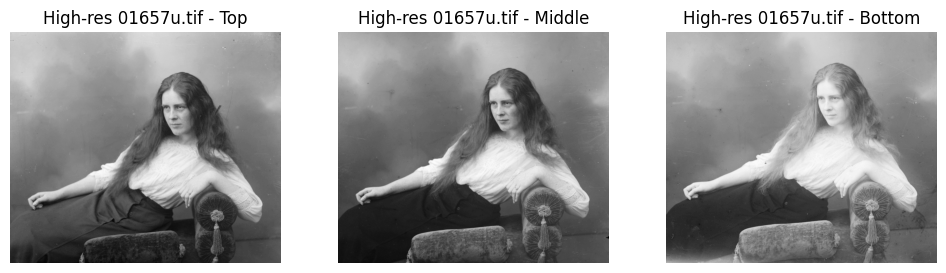

In [10]:
# Plot low-resolution slices
for i, (top, middle, bottom) in enumerate(low_res_slices):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(top, cmap='gray')
    plt.title(f'Low-res {image_files_low_res[i]} - Top')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(middle, cmap='gray')
    plt.title(f'Low-res {image_files_low_res[i]} - Middle')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(bottom, cmap='gray')
    plt.title(f'Low-res {image_files_low_res[i]} - Bottom')
    plt.axis('off')
    plt.show()

# Plot high-resolution slices
for i, (top, middle, bottom) in enumerate(high_res_slices):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(top, cmap='gray')
    plt.title(f'High-res {image_files_high_res[i]} - Top')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(middle, cmap='gray')
    plt.title(f'High-res {image_files_high_res[i]} - Middle')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(bottom, cmap='gray')
    plt.title(f'High-res {image_files_high_res[i]} - Bottom')
    plt.axis('off')
    plt.show()